<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EA%B9%80%EA%B3%A0%EC%9D%80/10_29_02_05_Morphological_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphological Transformations

## Goal
In this chapter,
* We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.
* We will see different functions like : `cv2.erode()`, `cv2.dilate()`, `cv2.morphologyEx()` etc.

## Theory

**Morphological transformations** are some simple operations based on **the image shape**. 
It is normally performed on binary images. 

* It needs two inputs, 
  * one is our **original image**, 
  * second one is called **structuring element(SE)** or **kernel** 
    * which decides the nature of operation. 

Two basic morphological operators are 
* **Erosion** and 
* **Dilation**. 

Then its variant forms like 
* **Opening**, 
* **Closing**, 
* **Gradient** etc also comes into play. 

We will see them one-by-one with help of following image:

![j.png](https://github.com/dsaint31x/OpenCV_Python_Tutorial/blob/master/images/j.png?raw=1)

## 1. Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, I would use a 5x5 kernel with full of ones. Let’s see it how it works:

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


(<matplotlib.image.AxesImage at 0x7f986e9c2d50>, (-0.5, 111.5, 149.5, -0.5))

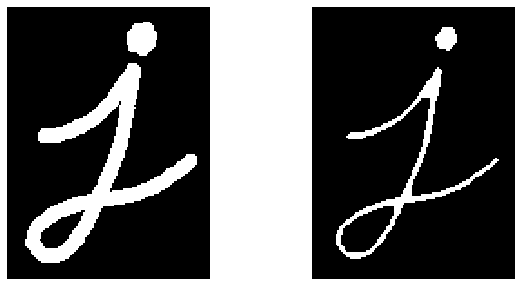

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/j.png',0)

kernel = np.ones((5,5),np.uint8)
print(kernel)

erosion = cv2.erode(img,kernel,iterations = 1)
plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(erosion,cmap='gray'), plt.axis('off')

## 2. Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

(<matplotlib.image.AxesImage at 0x7f986e949690>, (-0.5, 111.5, 149.5, -0.5))

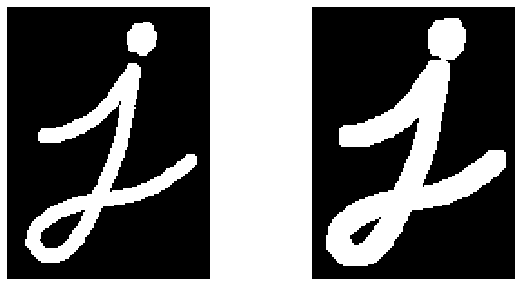

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(dilation,cmap='gray'), plt.axis('off')

## Opening

Opening is just another name of **erosion followed by dilation**. 

It is useful in removing noise, as we explained above. Here we use the function, `cv2.morphologyEx()`

uint8


(<matplotlib.image.AxesImage at 0x7f986e8b1890>, (-0.5, 111.5, 149.5, -0.5))

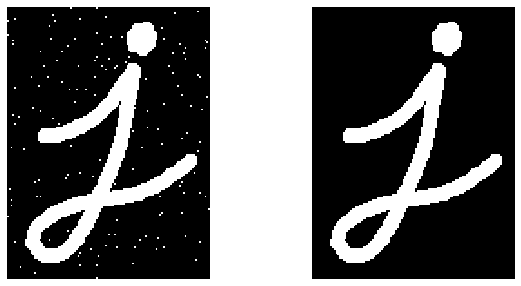

In [ ]:
row,col = img.shape
s_vs_p = 1 #0.5
amount = 0.01
out = np.copy(img)
# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i, int(num_salt))
          for i in img.shape]
out[tuple(coords)] = np.max(img)
        
# Pepper mode
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i, int(num_pepper))
          for i in img.shape]
out[tuple(coords)] = np.min(img)

print(img.dtype)
# kernel = np.ones((3,3),np.uint8)        
opening = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(out,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(opening,cmap='gray'), plt.axis('off')

## 4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object

uint8


(<matplotlib.image.AxesImage at 0x7f986e7e7e50>, (-0.5, 111.5, 149.5, -0.5))

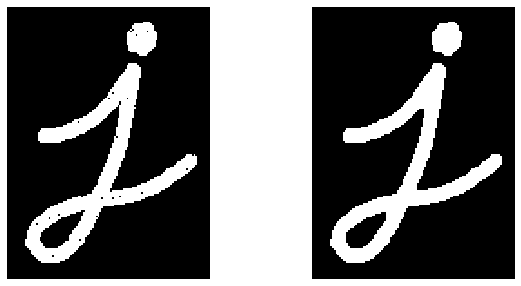

In [ ]:
row,col = img.shape
s_vs_p = 0.0 #1.0
amount = 0.01
out = np.copy(img)
# Salt mode
num_salt = np.ceil(amount * img.size * s_vs_p)
coords = [np.random.randint(0, i, int(num_salt))
          for i in img.shape]
out[tuple(coords)] = np.max(img)
        
# Pepper mode
num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
coords = [np.random.randint(0, i, int(num_pepper))
          for i in img.shape]
out[tuple(coords)] = np.min(img)

print(img.dtype)
#kernel = np.ones((3,3),np.uint8)        
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(out,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(closing,cmap='gray'), plt.axis('off')

## 5. Morphological Gradient

It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

(<matplotlib.image.AxesImage at 0x7f986e705f90>, (-0.5, 111.5, 149.5, -0.5))

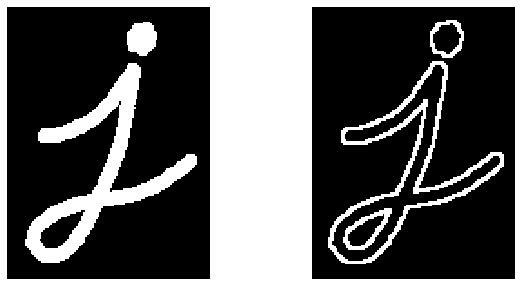

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10,5))
plt.subplot('121')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('122')
plt.imshow(gradient,cmap='gray'), plt.axis('off')

## 6. Top Hat

It is the difference between input image and Opening of the image. 

Below example is done for a **9x9 kernel**.

(<matplotlib.image.AxesImage at 0x7f986e46dcd0>, (-0.5, 111.5, 149.5, -0.5))

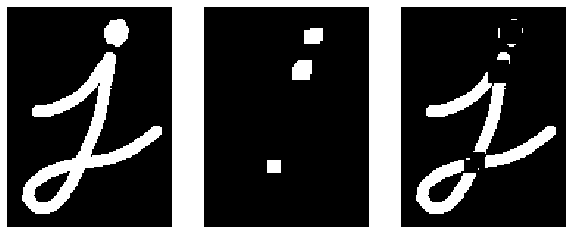

In [ ]:
kernel = np.ones((9,9),np.uint8)

opening = cv2.morphologyEx(out, cv2.MORPH_OPEN, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(10,5))
plt.subplot('131')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('132')
plt.imshow(opening,cmap='gray'), plt.axis('off')
plt.subplot('133')
plt.imshow(tophat,cmap='gray'), plt.axis('off')

## 7. Black Hat

It is the difference between the closing of the input image and input image.

Below example is done for a **9x9 kernel**.

(<matplotlib.image.AxesImage at 0x7f986e149d50>, (-0.5, 111.5, 149.5, -0.5))

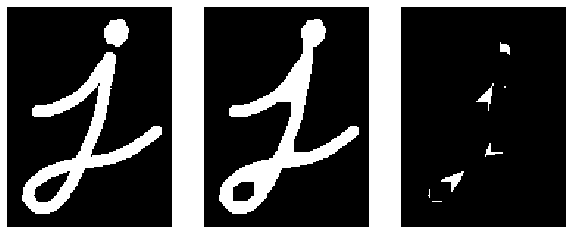

In [ ]:
kernel = np.ones((9,9),np.uint8)

closing = cv2.morphologyEx(out, cv2.MORPH_CLOSE, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10,5))
plt.subplot('131')
plt.imshow(img,cmap='gray'), plt.axis('off')
plt.subplot('132')
plt.imshow(closing,cmap='gray'), plt.axis('off')
plt.subplot('133')
plt.imshow(blackhat,cmap='gray'), plt.axis('off')

## Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [ ]:
# Rectangular Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]]


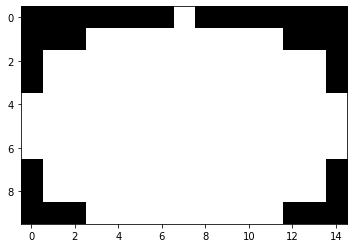

In [ ]:
# Elliptical Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,10))
print(kernel)
plt.imshow(kernel, cmap='gray')

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


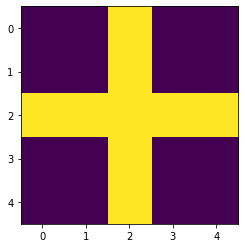

In [ ]:
# Cross-shaped Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print(kernel)
plt.imshow(kernel)

## Additional Resources

1. [Morphological Operations](http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm) at HIPR2
2. [Morphological Transformations](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html#dilation) at OpenCV-Python Tutorials